# [`ultralytics_api`](../vancouver_watching/ai/classes.py) Inference Sandbox

model: https://hub.ultralytics.com/models/R6nMlK6kQjSsQ76MPqQM?tab=preview

In [1]:
# !cd ~/git/vancouver-watching; pip3 install -e .

In [2]:
import os
os.environ["abcli_path_bash"] = "{}/git/awesome-bash-cli/bash".format(os.getenv("HOME"))

In [3]:
from IPython.display import Image
import matplotlib.pyplot as plt
from abcli import file
from abcli import fullname
from abcli.modules import objects
from abcli import string
from abcli.plugins import seed
from vancouver_watching.ai.classes import Ultralytics_API
from vancouver_watching.logger import logger


logger.info(f"{fullname()}, built on {string.pretty_date()}")

 botocore.credentials :: Found credentials in shared credentials file: ~/.aws/credentials
 vanwatch :: abcli-7.2883.1-AI-3-vanwatch-tests-b, built on 02 March 2024, 21:13:10


In [4]:
object_name = "2024-02-02-18-26-13-21057"
filename = "georgiaE.jpg"

object_path = objects.object_path(object_name)

In [5]:
%%bash -s $object_name $filename
source ~/git/awesome-bash-cli/abcli/.abcli/abcli.sh in_notebook

object_name=$1
filename=$2

abcli download filename=$filename $object_name

📜 loaded 37 variable(s) from /Users/kamangir/git/awesome-bash-cli/.env
🔋 gpu: not found.
🚀 abcli-7.2883.1.AI-3-vanwatch-tests-b
downloading 2024-02-02-18-26-13-21057/georgiaE.jpg ...
download: s3://kamangir/bolt/2024-02-02-18-26-13-21057/georgiaE.jpg to ../../../storage/abcli/2024-02-02-18-26-13-21057/georgiaE.jpg
download completed: 2024-02-02-18-26-13-21057 georgiaE.jpg


---

In [6]:
# https://hub.ultralytics.com/models/<model-id>?tab=preview

# model_id = "R6nMlK6kQjSsQ76MPqQM" # default, YOLOv8x (heaviest)

model_id = "1xKPEuwRoyDdwL6uamBI" # YOLOv8n (lightest)

In [7]:
ultralytics_api = Ultralytics_API(model_id=model_id)

 vanwatch :: Ultralytics_API.url: https://api.ultralytics.com/v1/predict/1xKPEuwRoyDdwL6uamBI


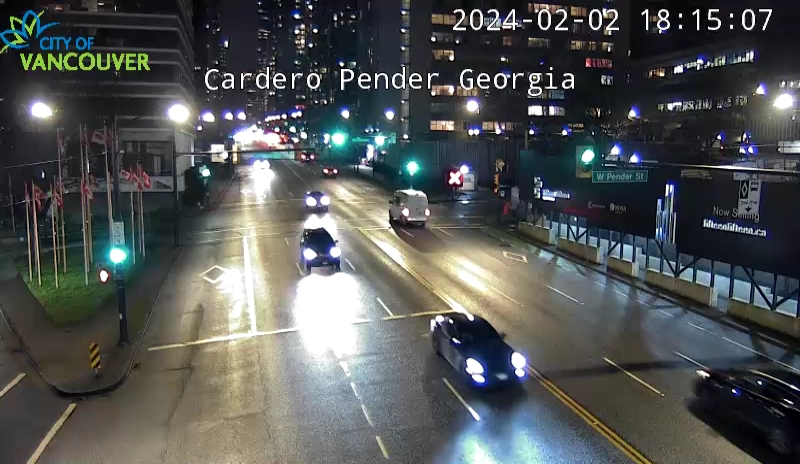

In [8]:
image_filename = os.path.join(object_path, filename)
Image(image_filename)

In [9]:
success, response_dict = ultralytics_api.infer(image_filename)
assert success
# response_dict

 vanwatch :: Ultralytics_API.infer(/Users/kamangir/storage/abcli/2024-02-02-18-26-13-21057/georgiaE.jpg)
 vanwatch :: car: 4
 abcli :: save_image: 659x800x3:uint8 -> /Users/kamangir/storage/abcli/2024-02-02-18-26-13-21057/georgiaE-inference.jpg


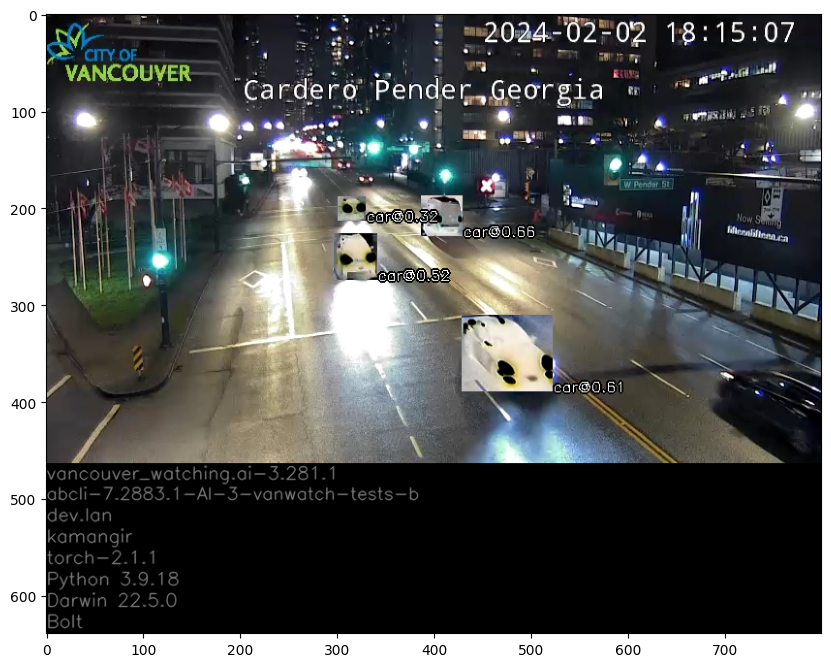

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(ultralytics_api.render(
    file.load_image(image_filename)[1].copy(),
    response_dict
))
plt.show()

---

In [11]:
%%bash -s $object_name
source ~/git/awesome-bash-cli/abcli/.abcli/abcli.sh in_notebook

object_name=$1

abcli select $object_name
abcli tag set . built_by_notebook
abcli upload

📜 loaded 37 variable(s) from /Users/kamangir/git/awesome-bash-cli/.env
🔋 gpu: not found.
🚀 abcli-7.2883.1.AI-3-vanwatch-tests-b
📂 object :: 2024-02-02-18-26-13-21057


 abcli :: 2024-02-02-18-26-13-21057 += #built_by_notebook.


confirmed: 2024-02-02-18-26-13-21057 does not exist.
2024-02-02-18-26-13-21057 open upload started.
upload: ./georgiaE-inference.jpg to s3://kamangir/bolt/2024-02-02-18-26-13-21057/georgiaE-inference.jpg


 abcli :: 2024-02-02-18-26-13-21057 += #open.


In [12]:
seed.log(object_name)

 abcli :: abcli select 2024-02-02-18-26-13-21057; open .


In [13]:
# END